# Chapter 6: Stochastic Dynamics

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Environment-Preparation" data-toc-modified-id="Environment-Preparation-2">Environment Preparation</a></span></li><li><span><a href="#Program-6.1:-SIR-model-with-Constant-additive-noise" data-toc-modified-id="Program-6.1:-SIR-model-with-Constant-additive-noise-3">Program 6.1: SIR model with Constant additive noise</a></span></li><li><span><a href="#Program-6.2:-SIR-model-with-Scaled-additive-noise" data-toc-modified-id="Program-6.2:-SIR-model-with-Scaled-additive-noise-4">Program 6.2: SIR model with Scaled additive noise</a></span></li><li><span><a href="#Program-6.3:-SIS-model-with-demographic-stochasticity" data-toc-modified-id="Program-6.3:-SIS-model-with-demographic-stochasticity-5">Program 6.3: SIS model with demographic stochasticity</a></span></li><li><span><a href="#Program-6.4:-SIR-model-with-demographic-stochasticity" data-toc-modified-id="Program-6.4:-SIR-model-with-demographic-stochasticity-6">Program 6.4: SIR model with demographic stochasticity</a></span><ul class="toc-item"><li><span><a href="#Program-6.4-(N=5000)" data-toc-modified-id="Program-6.4-(N=5000)-6.1">Program 6.4 (N=5000)</a></span></li><li><span><a href="#Program-6.4-(N=50)" data-toc-modified-id="Program-6.4-(N=50)-6.2">Program 6.4 (N=50)</a></span></li></ul></li><li><span><a href="#Program-6.5:-SIR-model-with-tau-leap-method" data-toc-modified-id="Program-6.5:-SIR-model-with-tau-leap-method-7">Program 6.5: SIR model with tau leap method</a></span><ul class="toc-item"><li><span><a href="#Program-6.5-(N=5000)" data-toc-modified-id="Program-6.5-(N=5000)-7.1">Program 6.5 (N=5000)</a></span></li><li><span><a href="#Program-6.5-(N=50)" data-toc-modified-id="Program-6.5-(N=50)-7.2">Program 6.5 (N=50)</a></span></li></ul></li><li><span><a href="#Program-6.6:-SIR-model-with-two-types-of-imports" data-toc-modified-id="Program-6.6:-SIR-model-with-two-types-of-imports-8">Program 6.6: SIR model with two types of imports</a></span></li></ul></div>

## Introduction

Chapter 5 discusses stochastic dynamics, i.e. proabilistic modelling and variable outcomes. This chapter details three distinct methods of approximating the chance element in disease transmission and recovery: (1) introducing chance directly into the population variables, (2) by random parameter variation, and (3) individual-level, explicit modeling of the random events (Bartlett 1957). On purpose a random seed was not added, so the reader can see the effect of stochasticity straight of out the models. For more details please refer back to the book (http://modelinginfectiousdiseases.org/).

## Environment Preparation

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as mfp

In [2]:
pl.style.use('seaborn-whitegrid')
pl.rcParams['font.family'] = "sans-serif"

## Program 6.1: SIR model with Constant additive noise

[[100004.27142598    500.44596866]
 [100015.55017973    494.17616147]
 [100007.49174981    506.91944334]
 ...
 [103672.69955309    298.24331947]
 [103692.08593104    303.52997264]
 [103714.92764508    305.02189724]]


Text(0.5, 0, 'Time (Years)')

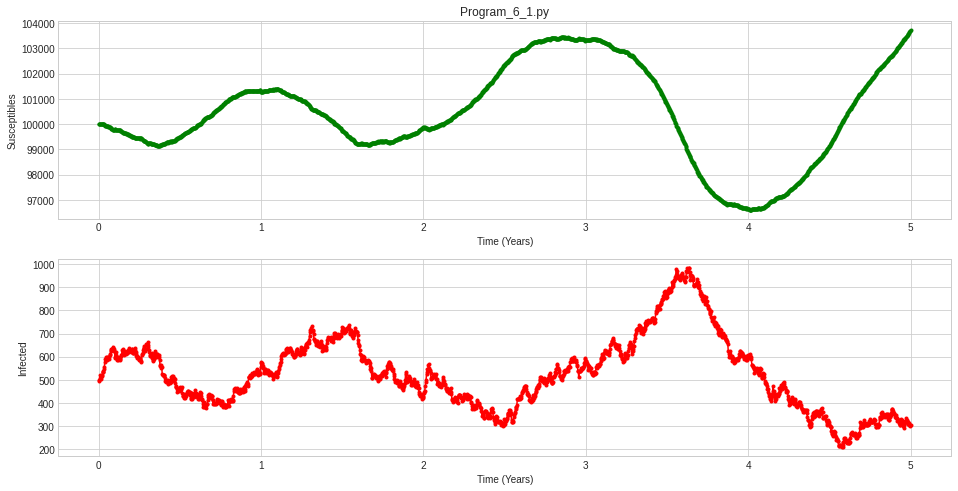

In [3]:
# Parameters
beta=1.0;
noise=10;
gamma=1/10.0;
mu=1/(50*365.0);
X0=1e5;
Y0=500;
N0=1e6;
Step=1.0;
ND=MaxTime=5*365.0;
TS=1.0

INPUT0=np.hstack((X0,Y0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP
	Y[0] = mu * N0 - beta*V[0]*V[1]/N0 - Noise - mu*V[1]
	Y[1] = beta*V[0]*V[1]/N0 + Noise -  mu*V[1] - gamma*V[1]
	return Y   # For odeint


T=np.zeros((int(np.ceil(ND/Step)),1))
RES=np.zeros((int(np.ceil(ND/Step)),2))
INPUT=INPUT0
t=0
loop=0

# Model Run
while t<ND and INPUT[0]>0 and INPUT[1]>0:
	t_start = 0.0; t_end = t_start+Step; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	sqrtStep=np.sqrt(Step)
	Noise=noise* np.random.normal(size=1)/sqrtStep
	PRES = spi.odeint(diff_eqs,INPUT,t_range)
	T[loop]=t=t+Step
	INPUT=PRES[-1]
	RES[loop]=PRES[-1]
	loop += 1

# Print Results
print(RES)

### plotting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(T/365., RES[:,0], '.-g')
pl.xlabel('Time (Years)')
pl.ylabel('Susceptibles')
pl.title("Program_6_1.py")
pl.subplot(212)
pl.plot(T/365., RES[:,1], '.-r')
pl.ylabel('Infected')
pl.xlabel('Time (Years)')

## Program 6.2: SIR model with Scaled additive noise

[[ 99999.38844616    491.43867667]
 [100008.83159549    482.670988  ]
 [ 99999.63901405    477.49709524]
 ...
 [101992.45569208    629.35905592]
 [101977.97168633    634.6912264 ]
 [101973.83456598    640.0820968 ]]


Text(0.5, 0, 'Time (Years)')

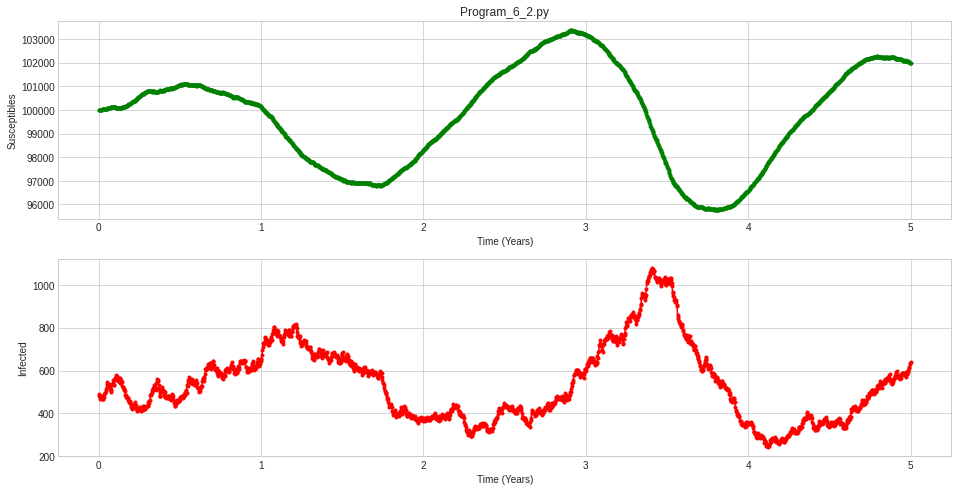

In [4]:
# Parameters
beta=1.0;
gamma=1/10.0;
mu=1/(50*365.0);
X0=1e5;
Y0=500;
N0=1e6;
Step=1;
ND=MaxTime=5*365.0;
TS=1.0

INPUT0=np.hstack((X0,Y0))

# Model Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP
	Y[0] = (mu*N0 + np.sqrt(mu*N0)*P[0]) - (beta*V[0]*V[1]/N0 \
	+ np.sqrt(beta*V[0]*V[1]/N0)*P[1])	- (mu*V[1] + np.sqrt(mu*V[1])*P[2]);
	Y[1] = (beta*V[0]*V[1]/N0 + np.sqrt(beta*V[0]*V[1]/N0)*P[1]) - \
	(gamma*V[1] + np.sqrt(gamma*V[1])*P[3]) - (mu*V[1] + np.sqrt(mu*V[1])*P[4]);
	return Y   # For odeint

T=np.zeros((int(np.ceil(ND/Step)),1))
RES=np.zeros((int(np.ceil(ND/Step)),2))
INPUT=INPUT0
t=0
loop=0
sqrtStep=np.sqrt(Step)

# Model Run
while t<ND and INPUT[0]>0 and INPUT[1]>0:
	t_start = 0.0; t_end = t_start+Step; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	P=np.random.normal(size=5)/sqrtStep
	PRES = spi.odeint(diff_eqs,INPUT,t_range)
	T[loop]=t=t+Step
	INPUT=PRES[-1]
	RES[loop]=PRES[-1]
	loop += 1

# Print Results
print(RES)

### plotting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(T/365., RES[:,0], '.-g')
pl.xlabel('Time (Years)')
pl.ylabel('Susceptibles')
pl.title("Program_6_2.py")
pl.subplot(212)
pl.plot(T/365., RES[:,1], '.-r')
pl.ylabel('Infected')
pl.xlabel('Time (Years)')

## Program 6.3: SIS model with demographic stochasticity

Text(0.5, 1.0, 'Program_6_3.py')

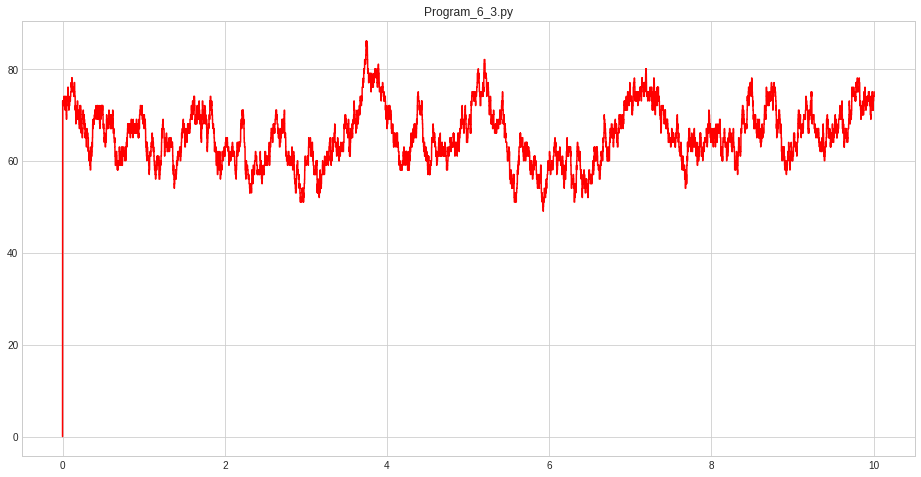

In [5]:
# Parameters
beta=0.03
gamma=1/100.0
Y0=70.0
N0=100.0
ND=MaxTime=10*365.0;


INPUT = Y0

timestep=0.0

# Model Definition
def stoc_eqs(INP,ts):
	Z=INP
	Rate1 = beta*(N0-Z)*Z/N0
	Rate2 = gamma*Z
	R1=pl.rand()
	R2=pl.rand()
	ts = -np.log(R2)/(Rate1+Rate2)
	if R1<(Rate1/(Rate1+Rate2)):
		Z += 1;  # do infection
	else:
		Z -= 1;  # do recovery
	return [Z,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	RES=[0]
	while T[lop] < ND and INPUT > 0:
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1]+ts)
		RES.append(INPUT)
		lop=lop+1
		T.append(T[lop-1])
		RES.append(res)
		INPUT=res
	return [RES, T]

# Model Run
[RES,t]=Stoch_Iteration(INPUT)

t=np.array(t)
RES=np.array(RES)
### plotting
pl.figure(figsize=(16, 8))
pl.plot(t/365., RES, 'r')
pl.title("Program_6_3.py")

## Program 6.4: SIR model with demographic stochasticity

### Program 6.4 (N=5000)

Text(0, 0.5, 'Recovered')

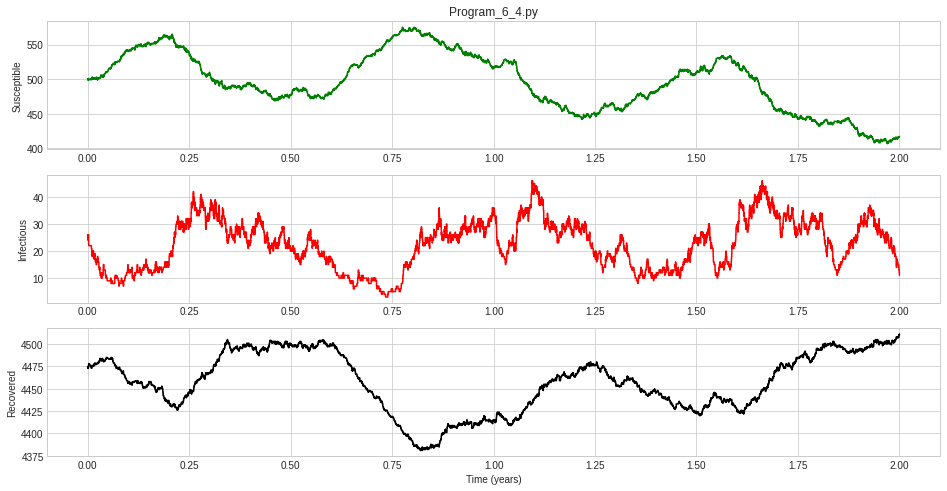

In [6]:
# Parameters
beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

# Model Definition
def stoc_eqs(INP,ts):
	V = INP
	Rate=np.zeros((6))
	Change=np.zeros((6,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=np.amin(np.where(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(3)]=V[range(3)]+Change[m,:]
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]

# Model Run
[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

# plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
if N0 == 50:
	pl.title("Program_6_4.py (N=50)")
else:
	pl.title("Program_6_4.py")
pl.subplot(312)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')

### Program 6.4 (N=50)

Text(0, 0.5, 'Recovered')

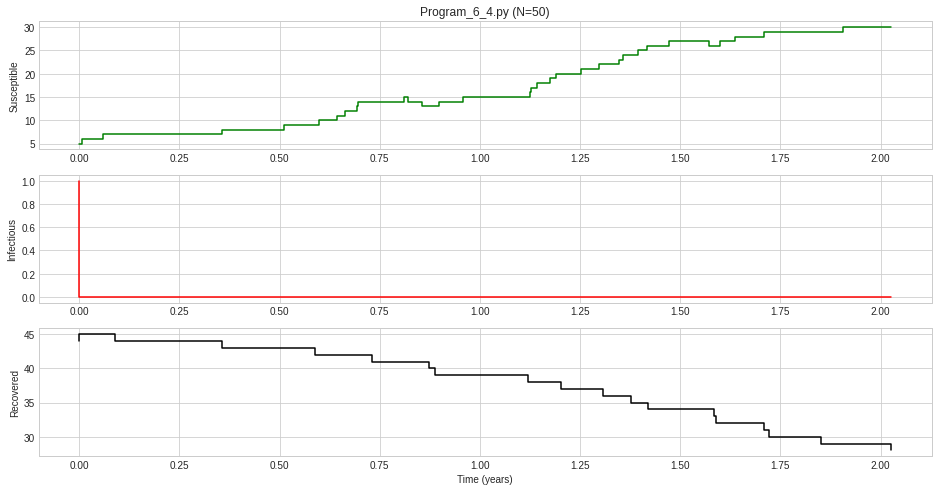

In [7]:
# Parameters
beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0))

timestep=0.0

# Model Definition
def stoc_eqs(INP,ts):
	V = INP
	Rate=np.zeros((6))
	Change=np.zeros((6,3))
	N=np.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=np.amin(np.where(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(3)]=V[range(3)]+Change[m,:]
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
	return [T,S,I,R]

# Model Run
[T,S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

# plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
if N0 == 50:
	pl.title("Program_6_4.py (N=50)")
else:
	pl.title("Program_6_4.py")
pl.subplot(312)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')

## Program 6.5: SIR model with tau leap method

### Program 6.5 (N=5000)

/tmp/ipykernel_2905/263684831.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  Use=min(Num, (V[np.where(Change[i,:]<0)]));


Text(0, 0.5, 'Recovered')

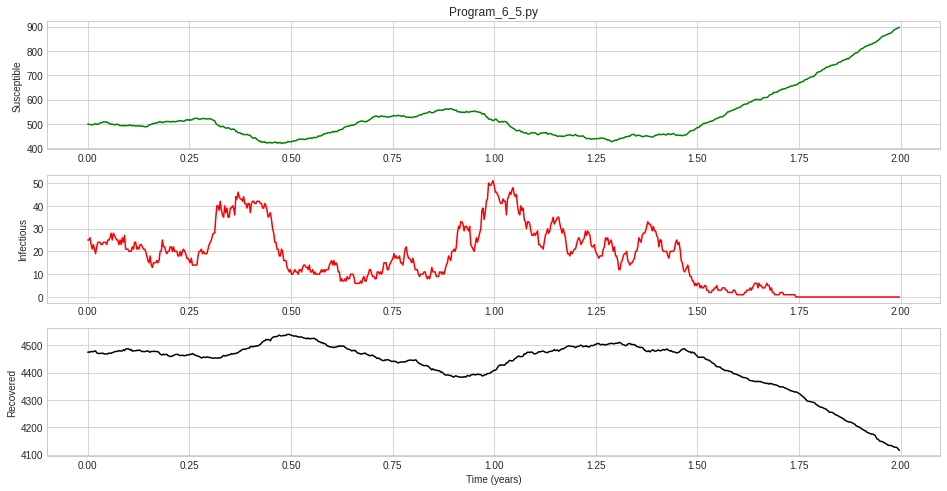

In [8]:
# Parameters
beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0
tau=1.0
INPUT = np.array((X0,Y0,Z0))

# Model Definition
def stoc_eqs(INP):
	V = INP
	Rate=np.zeros((6))
	Change=np.zeros((6,3))
	N=V[0]+V[1]+V[2]
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	for i in range(6):
		Num=np.random.poisson(Rate[i]*tau);
		## Make sure things don't go negative
		# print(V[pl.find(Change[i,:]<0)])
		Use=min(Num, (V[np.where(Change[i,:]<0)]));
		V=V+Change[i,:]*Use;
	return V

def Stoch_Iteration(INPUT):
	lop=0
	S=[0]
	I=[0]
	R=[0]
	for lop in T:
		res = stoc_eqs(INPUT)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		INPUT=res
	return [S,I,R]

# Model Run
T=np.arange(0.0, ND, tau)
[S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

# Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
if N0 == 50:
	pl.title("Program_6_5.py (N=50)")
else:
	pl.title("Program_6_5.py")
pl.subplot(312)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')

### Program 6.5 (N=50)

/tmp/ipykernel_2905/1770136567.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  Use=min(Num, (V[np.where(Change[i,:]<0)]));


Text(0, 0.5, 'Recovered')

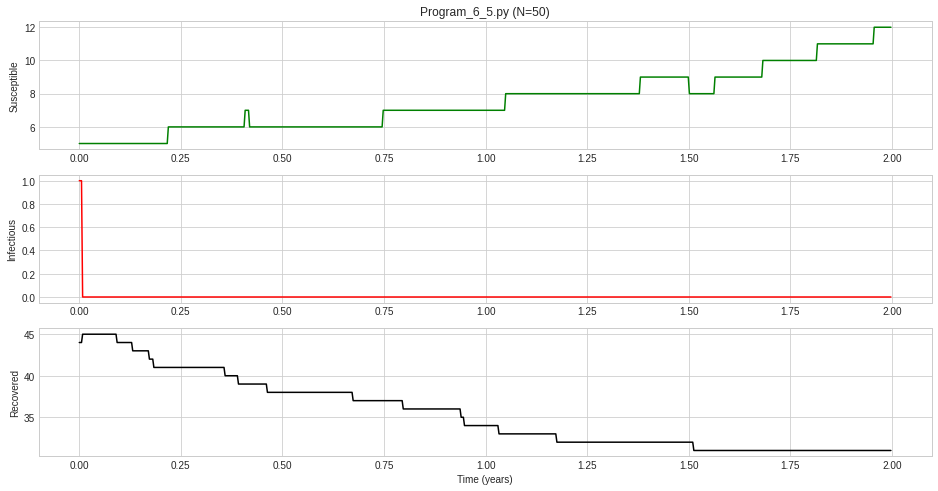

In [9]:
# Parameters
beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
N0=50.0
ND=MaxTime=2*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0
tau=1.0
INPUT = np.array((X0,Y0,Z0))

# Model Definition
def stoc_eqs(INP):
	V = INP
	Rate=np.zeros((6))
	Change=np.zeros((6,3))
	N=V[0]+V[1]+V[2]
	Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	for i in range(6):
		Num=np.random.poisson(Rate[i]*tau);
		## Make sure things don't go negative
		# print(V[pl.find(Change[i,:]<0)])
		Use=min(Num, (V[np.where(Change[i,:]<0)]));
		V=V+Change[i,:]*Use;
	return V

def Stoch_Iteration(INPUT):
	lop=0
	S=[0]
	I=[0]
	R=[0]
	for lop in T:
		res = stoc_eqs(INPUT)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		INPUT=res
	return [S,I,R]

# Model Run
T=np.arange(0.0, ND, tau)
[S,I,R]=Stoch_Iteration(INPUT)

tT=np.array(T)/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]

# Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(tT, tS, 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
if N0 == 50:
	pl.title("Program_6_5.py (N=50)")
else:
	pl.title("Program_6_5.py")
pl.subplot(312)
pl.plot(tT, tI, 'r')
#pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(tT, tR, 'k')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovered')

## Program 6.6: SIR model with two types of imports

Text(0.5, 0, 'Time (years)')

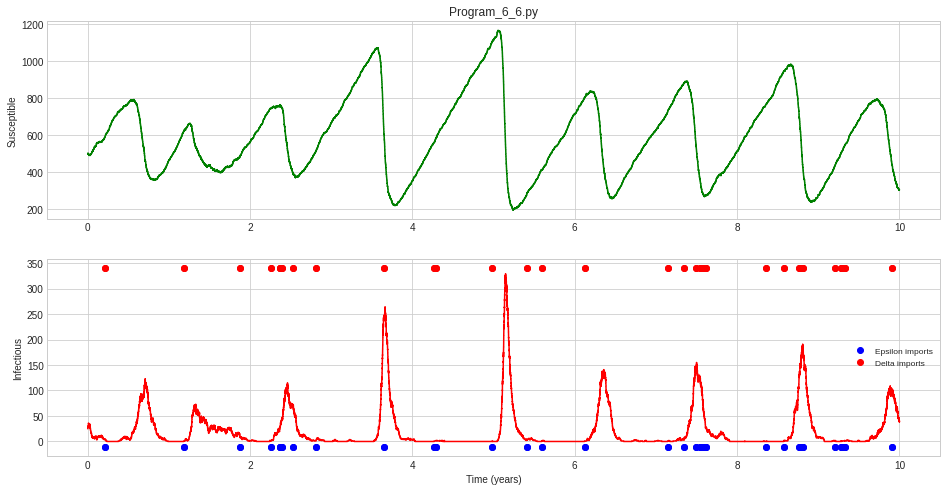

In [10]:
# Parameters
beta=1.0
gamma=1/10.0
mu=5e-4
N0=5000.0
delta=0.01;
epsilon=delta*10/N0;
ND=MaxTime=10*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

INPUT = np.array((X0,Y0,Z0, 0.0, 0.0))

timestep=0.0

# Model Definition
def stoc_eqs(INP,ts):
	V = INP
	Rate=np.zeros((8))
	Change=np.zeros((8,3))
	N=pl.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N;  Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = epsilon*V[0];  Change[6,:]=[-1, +1, 0];
	Rate[7] = delta;  Change[7,:]=[0, +1, 0];
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=np.amin(np.where(pl.cumsum(Rate)>=R1*pl.sum(Rate)));
	V[range(3)]=V[range(3)]+Change[m,:]
	V[3]=0; V[4]=0.;
	if m == 6: V[3] = 1.
	if m == 7: V[4] = 1.
	return [V,ts]

def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	et=[]
	dt=[]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		et.append(INPUT[3])
		dt.append(INPUT[4])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		et.append(INPUT[3])
		dt.append(INPUT[4])
		if lop>len(T):
			T[lop*2]=0
			S[lop*2]=0
			I[lop*2]=0
			R[lop*2]=0
			et[lop*2]=0
			dt[lop*2]=0
	return [T,S,I,R, et, dt]

# Model Run
[T,S,I,R, et, dt]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
indpl=np.where(tT<10)

### plotting
pl.figure(figsize=(16, 8))
pl.subplot(211)
h=pl.plot(tT[np.where(tT<10)], tS[np.where(tT<10)], 'g')
pl.ylabel ('Susceptible')
pl.title("Program_6_6.py")
pl.subplot(212)
pl.plot(tT[np.where(tT<10)], tI[np.where(tT<10)], 'r')
ax=pl.gca()
me=np.where(np.array(dt)>0)
md=np.where(np.array(dt)>0)
pl.plot(tT[me],np.zeros(np.size(me))+ax.get_ylim()[0]+5, 'bo', linewidth=4, label='Epsilon imports')
pl.plot(tT[me],np.zeros(np.size(me))+ax.get_ylim()[1]-5, 'ro', linewidth=4, label='Delta imports')
pl.legend(loc=7,prop=mfp(size='smaller'))
pl.ylabel ('Infectious')
pl.xlabel ('Time (years)')